In [2]:
library('fpp3')

### 1.0. Linear Regression Estimators

In [3]:
df = read.csv('../../../data/us_change.csv')
df = df |> select(!X)

df$Quarter = yearquarter(df$Quarter)

df = df |> as_tsibble(index = Quarter)

#### 1.1. Simple Linear Regression

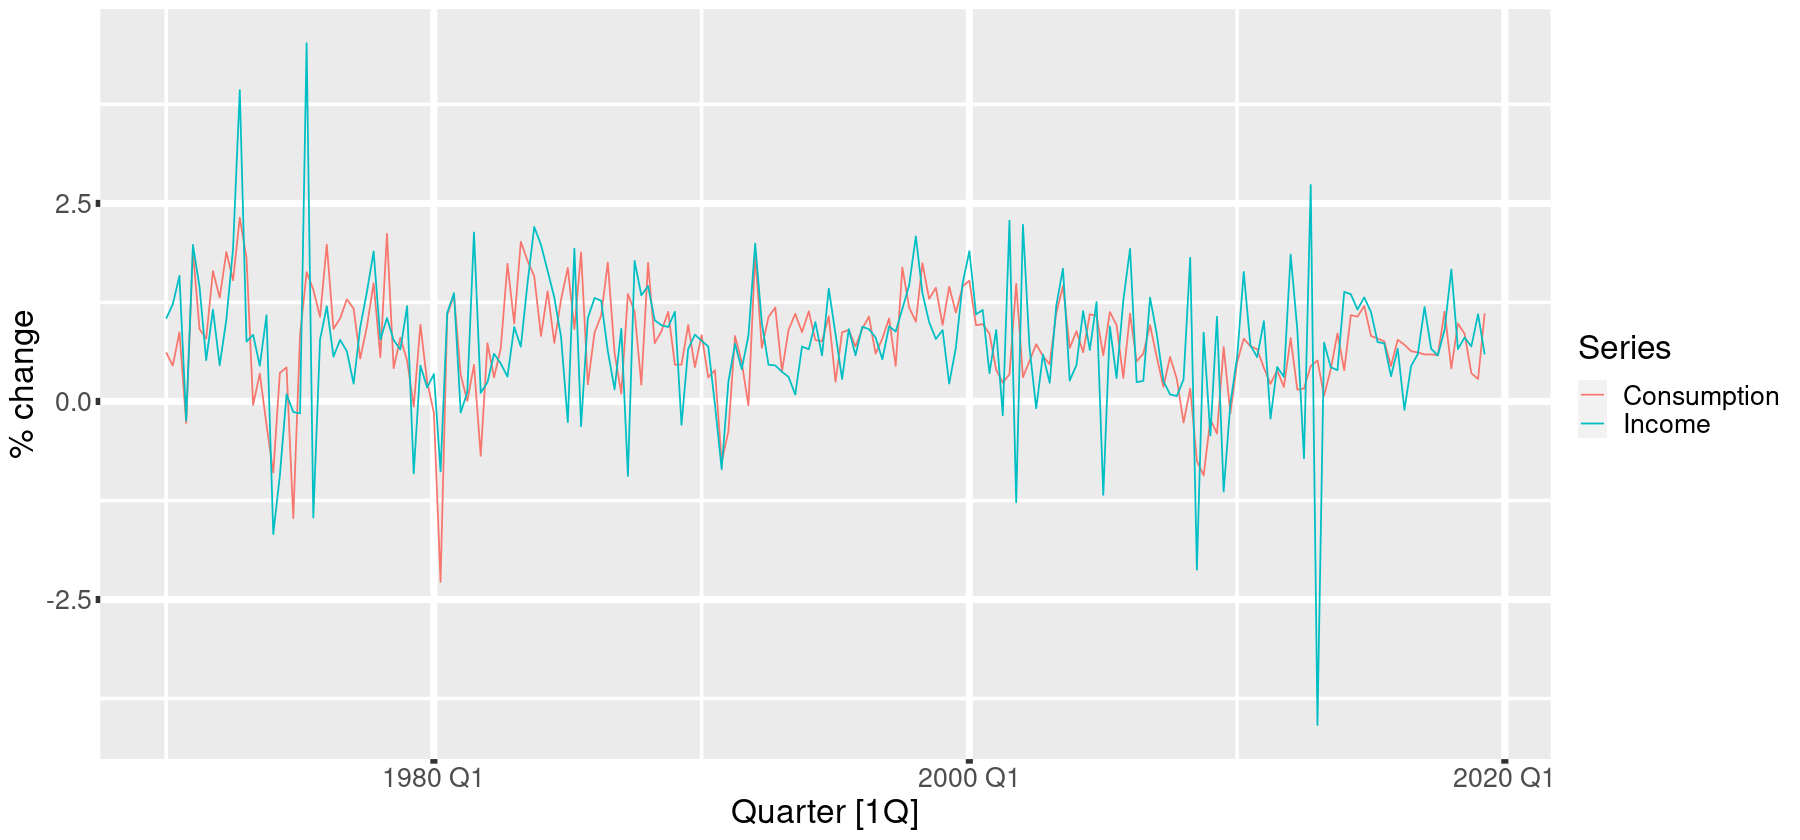

In [54]:
options(repr.plot.width = 15, repr.plot.height = 7)
df |> pivot_longer(c(Consumption, Income), names_to="Series") |> 
autoplot(value) + labs(y = "% change") +
theme(text = element_text(size = 20), element_line(size = 2))

In [81]:
fitted = df |>
  model(
    TSLM(Consumption ~ Income)
  )
report(fitted)

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58236 -0.27777  0.01862  0.32330  1.42229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54454    0.05403  10.079  < 2e-16 ***
Income       0.27183    0.04673   5.817  2.4e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5905 on 196 degrees of freedom
Multiple R-squared: 0.1472,	Adjusted R-squared: 0.1429
F-statistic: 33.84 on 1 and 196 DF, p-value: 2.4022e-08


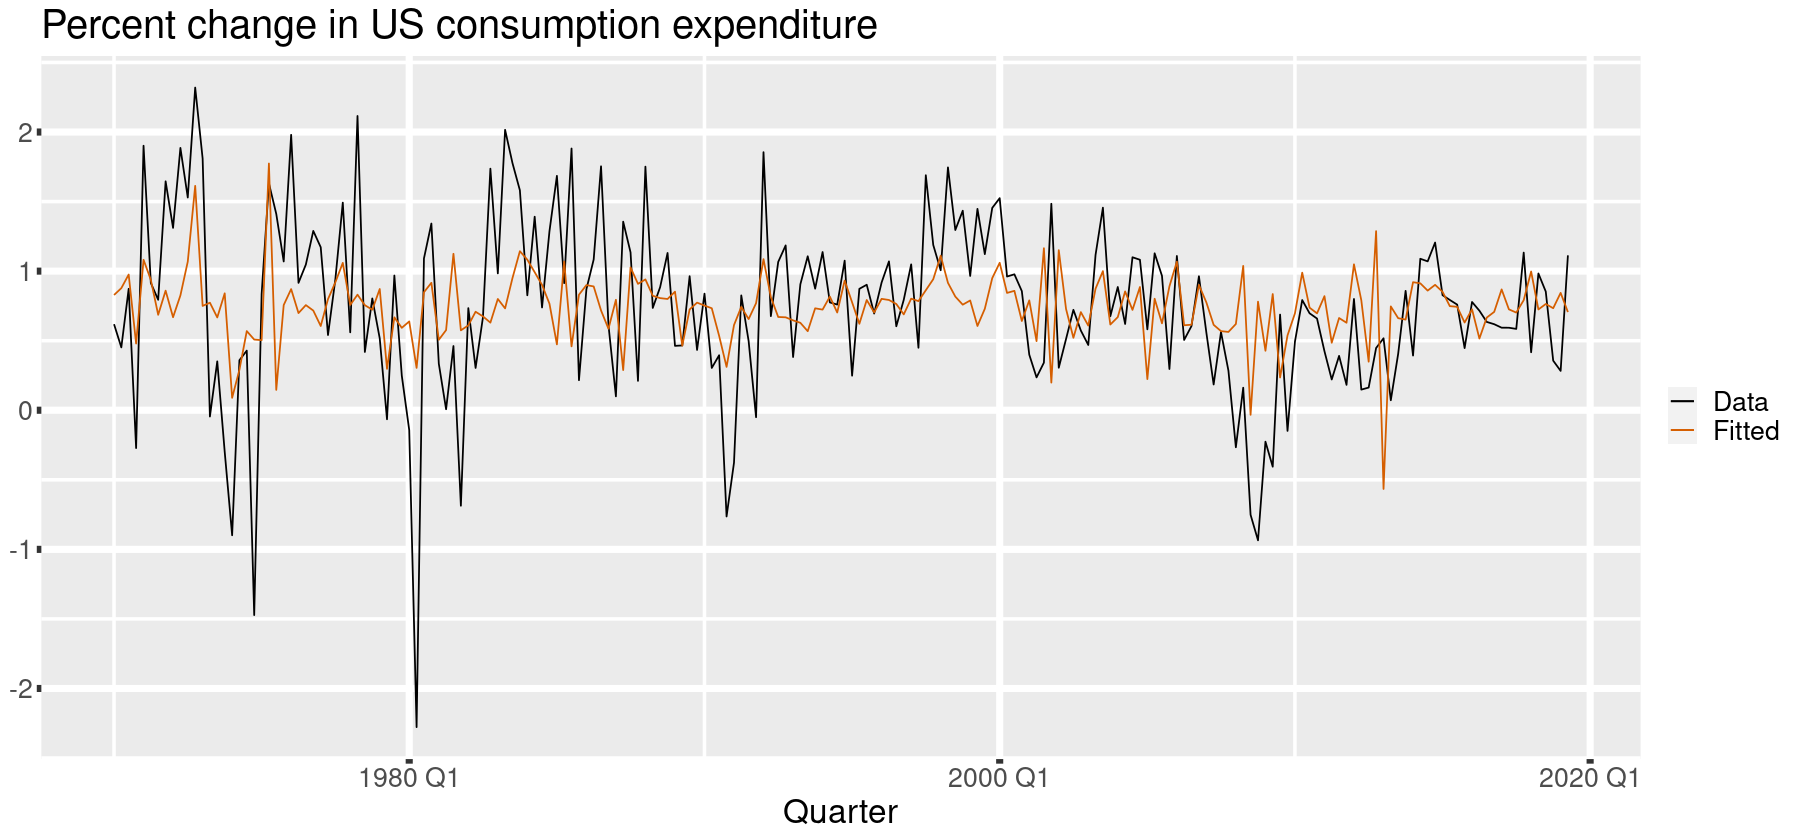

In [92]:
augment(fitted) |> ggplot(aes(x = Quarter)) +
geom_line(aes(y = Consumption, colour = 'Data')) +
geom_line(aes(y = .fitted, colour = 'Fitted')) +
labs(y = NULL,
  title = "Percent change in US consumption expenditure"
) + scale_colour_manual(values=c(Data="black",Fitted="#D55E00")) +
guides(colour = guide_legend(title = NULL)) +
theme(text = element_text(size = 20), element_line(size = 2))

#### 1.2. Multiple Linear Regression

In [4]:
fitted = df |>
  model(
    tslm = TSLM(
      Consumption ~ Income + Production + Unemployment + Savings
  )
)

report(fitted)

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90555 -0.15821 -0.03608  0.13618  1.15471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253105   0.034470   7.343 5.71e-12 ***
Income        0.740583   0.040115  18.461  < 2e-16 ***
Production    0.047173   0.023142   2.038   0.0429 *  
Unemployment -0.174685   0.095511  -1.829   0.0689 .  
Savings      -0.052890   0.002924 -18.088  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3102 on 193 degrees of freedom
Multiple R-squared: 0.7683,	Adjusted R-squared: 0.7635
F-statistic:   160 on 4 and 193 DF, p-value: < 2.22e-16


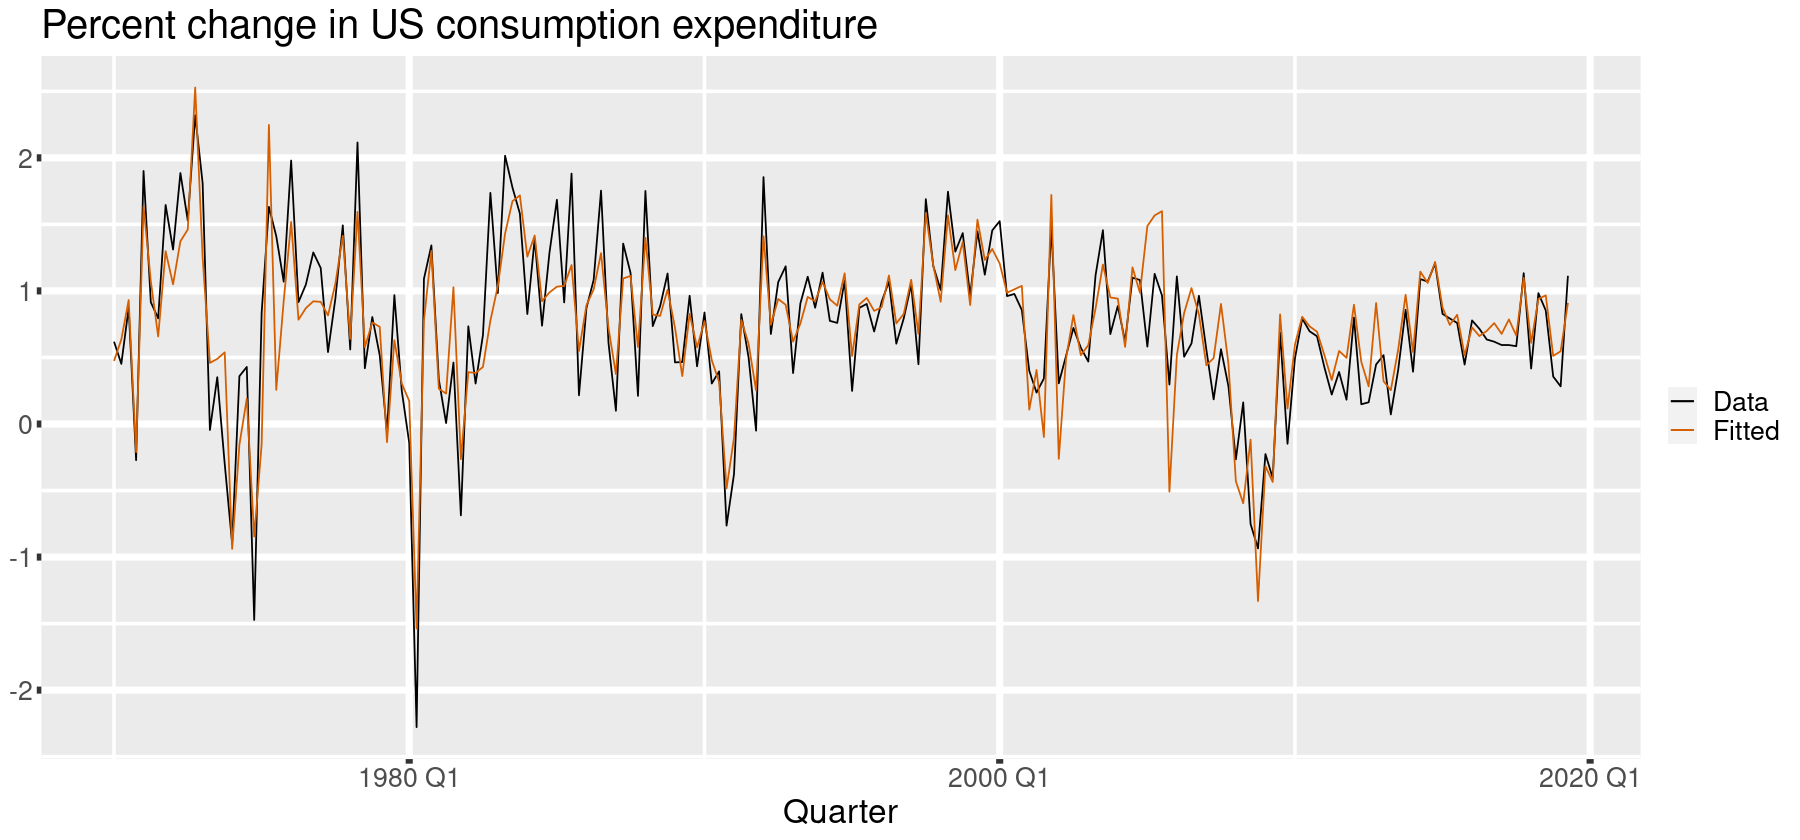

In [6]:
options(repr.plot.width = 15, repr.plot.height = 7)
augment(fitted) |> ggplot(aes(x = Quarter)) +
geom_line(aes(y = Consumption, colour = 'Data')) +
geom_line(aes(y = .fitted, colour = 'Fitted')) +
labs(y = NULL,
  title = "Percent change in US consumption expenditure"
) + scale_colour_manual(values=c(Data="black",Fitted="#D55E00")) +
guides(colour = guide_legend(title = NULL)) +
theme(text = element_text(size = 20), element_line(size = 2))

### 2.0. Residual Analysis

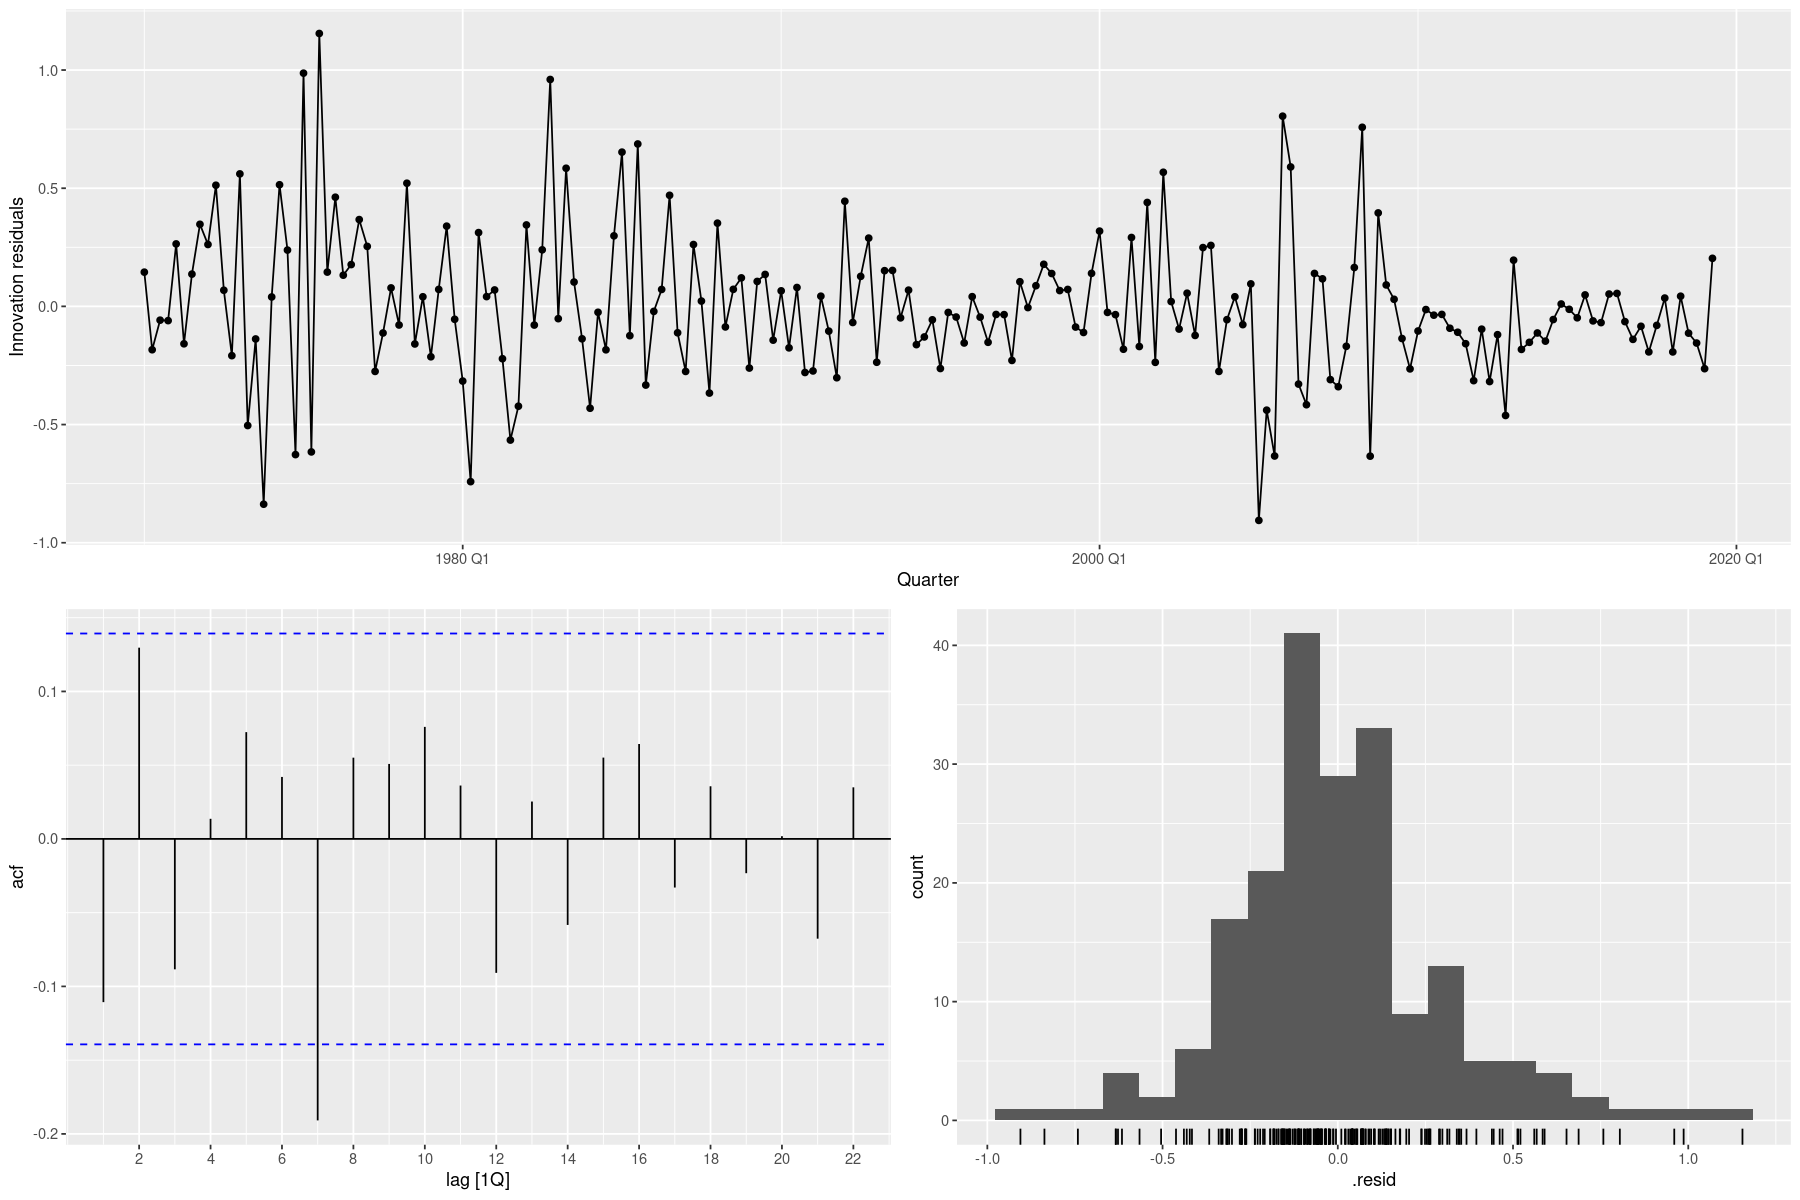

In [29]:
options(repr.plot.width = 15, repr.plot.height = 10)
fitted |> gg_tsresiduals()

In [17]:
df = df |> left_join(select(residuals(fitted), .resid), by = 'Quarter')

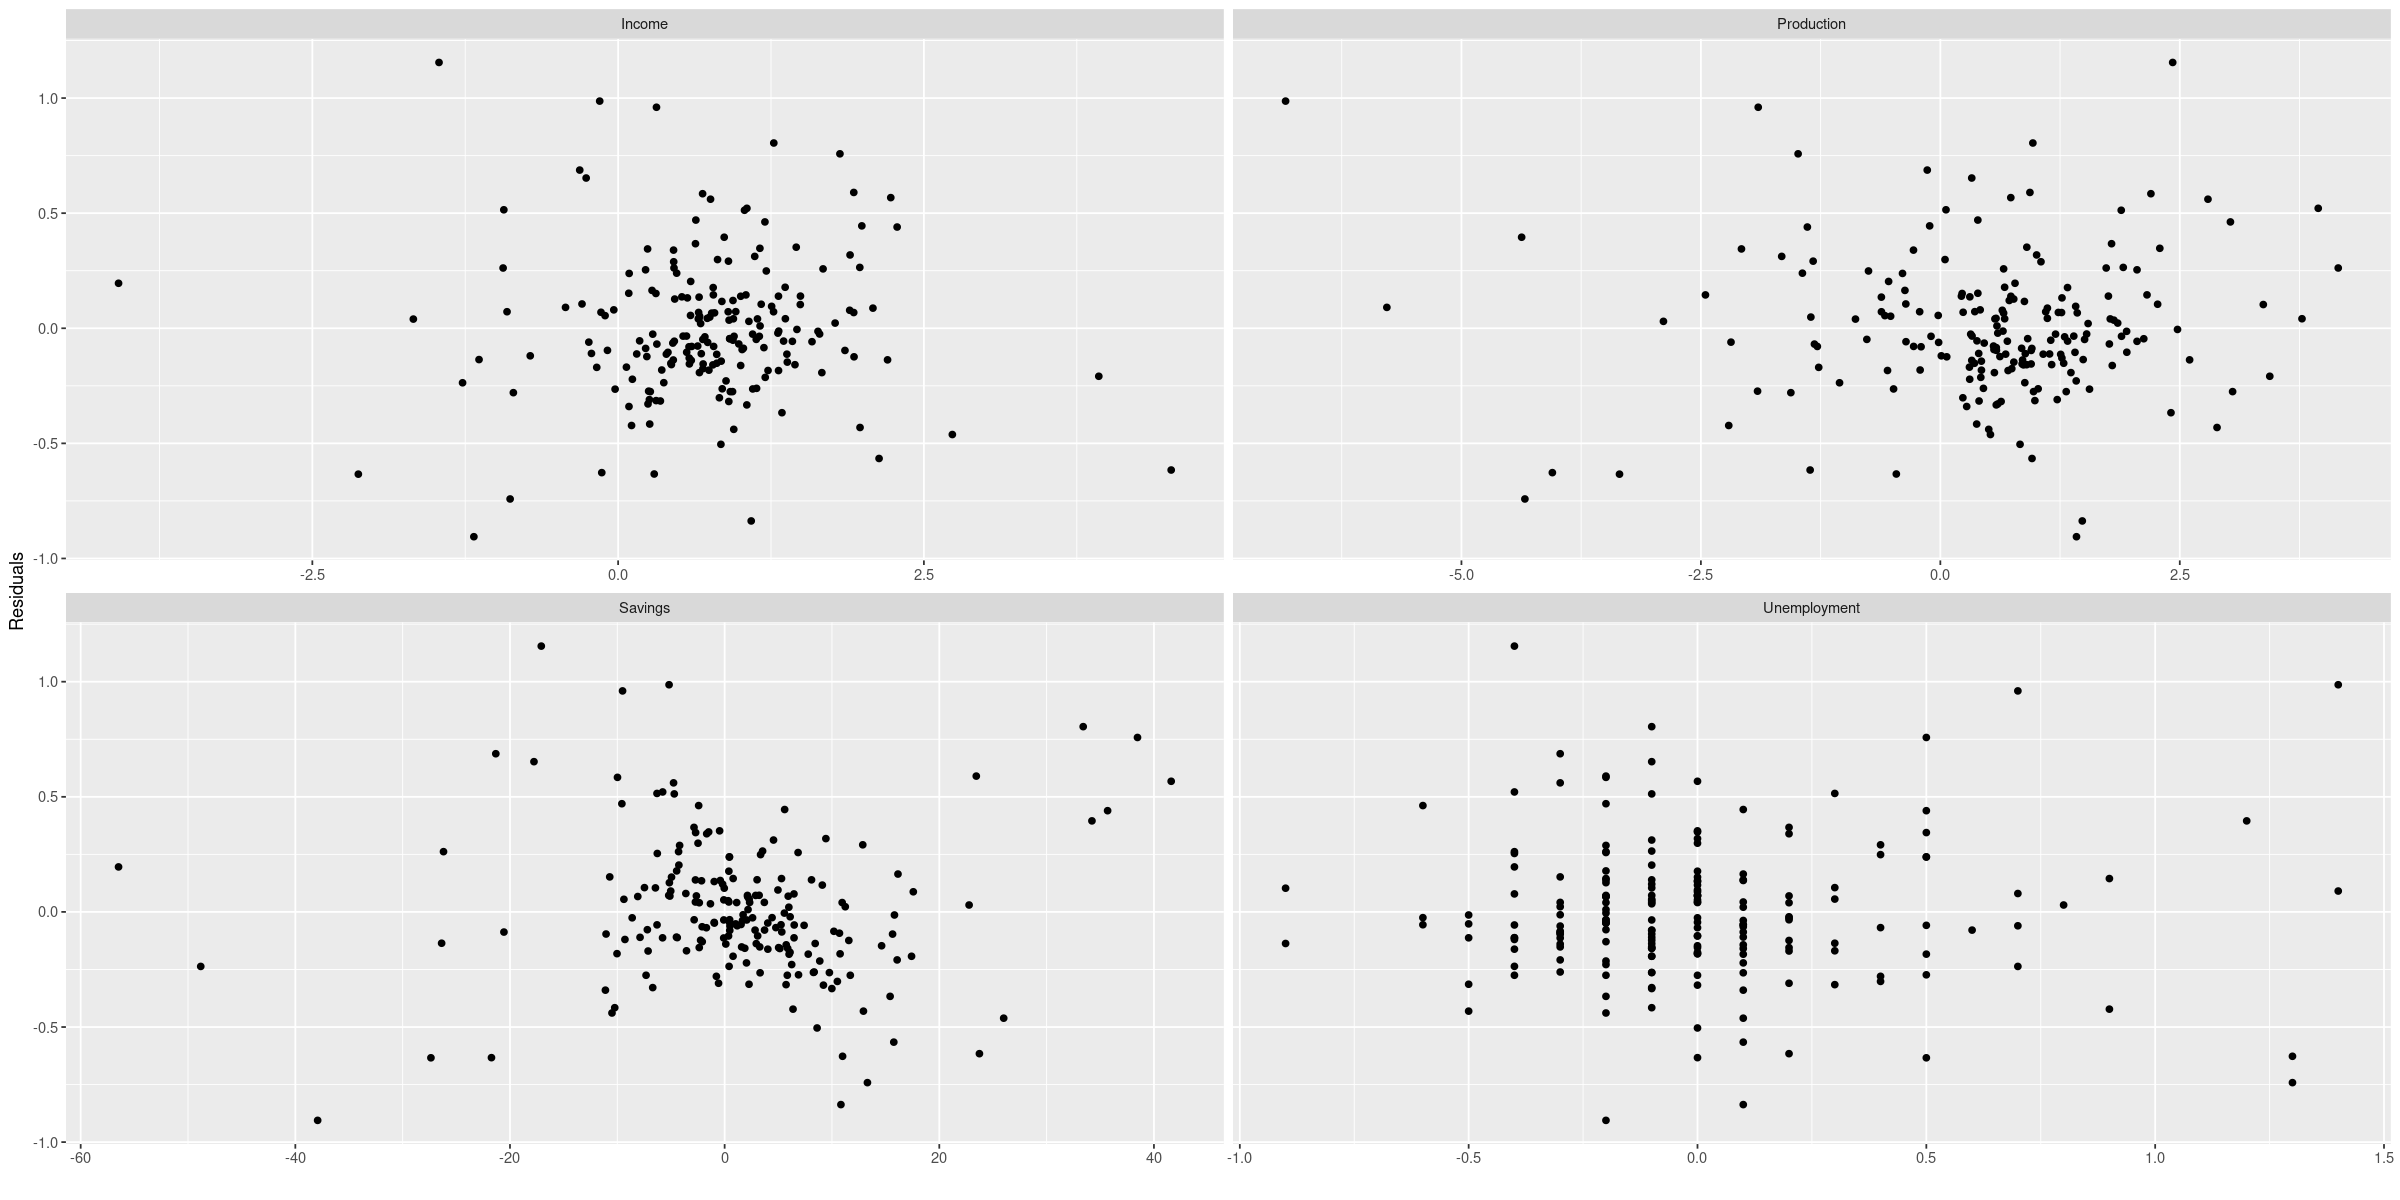

In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)
df |> pivot_longer(Income:Unemployment, names_to = "regressor", values_to = "x") |>
ggplot(aes(x = x, y = .resid)) + geom_point() +  facet_wrap(. ~ regressor, scales = "free_x") +
labs(y = "Residuals", x = "")

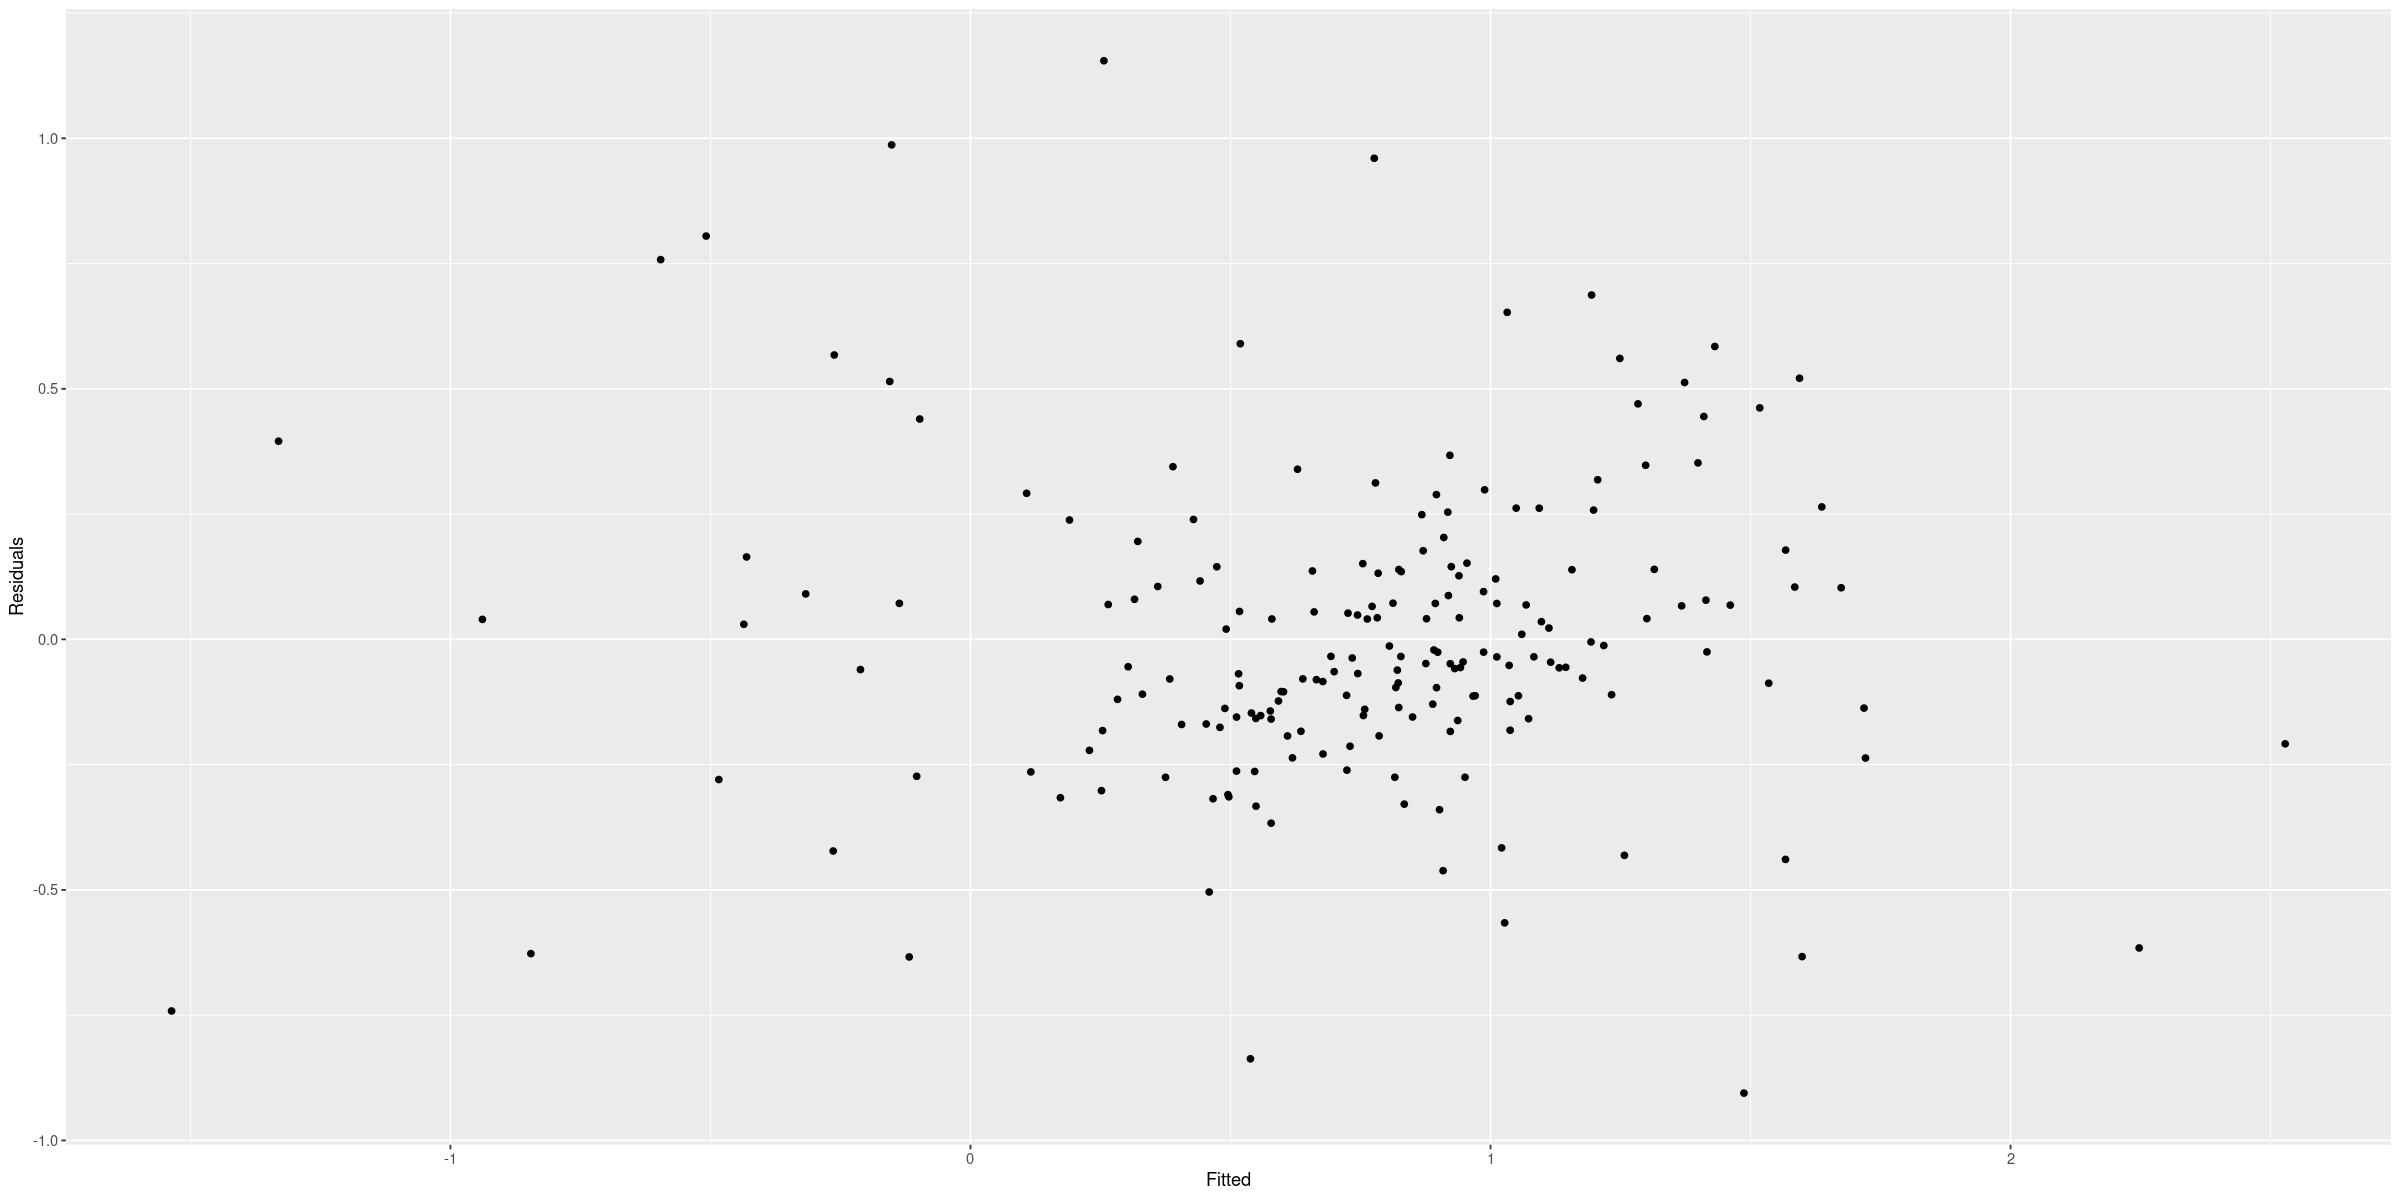

In [33]:
augment(fitted) |> ggplot(aes(x = .fitted, y = .resid)) +
geom_point() + labs(x = "Fitted", y = "Residuals")